In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from fonctions_utiles import *

In [2]:
report_df = pd.read_csv("report_df.csv")
report_df.head()

,Unnamed: 0,modèle,accuracy,precision,recall,f1-score,auc,threshold,fold_1,fold_2,fold_3,fold_4,fold_5,tp,tn,fp,fn
0,0,nn,0.755814,0.747283,0.766862,0.748152,0.792962,0.665602,0.727273,0.888889,0.800000,0.888889,0.888889,40,15,6,25
1,1,xgb,0.720930,0.696310,0.690323,0.692857,0.788856,0.562144,0.545455,0.800000,0.800000,0.888889,0.833333,44,11,13,18
2,2,rf,0.674419,0.639560,0.611730,0.614103,0.766276,0.524023,0.666667,0.909091,0.727273,0.909091,0.833333,46,9,19,12
3,3,lr,0.802326,0.790022,0.810264,0.794287,0.795894,0.596278,0.727273,0.571429,0.800000,0.909091,0.571429,43,12,5,26


In [ ]:
# We can use : Brier Score, ECE , Log vraisemblance négative to have calibration score
# We can use : Deep Ensembles, Monte Carlo Dropout, Test-Time Augmentation (TTA)
# See about Evidential Deep Learning (EDL)
# See about full entropy map

In [ ]:
# Lecture du dataset et extraction du X et du Y
final_df = pd.read_csv("final_df_sick_no_sick.csv")
X = final_df.drop(columns=['diagnosis'])
y = final_df.loc[:, "diagnosis"].astype(str)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

le_y = LabelEncoder().fit(y_train)
y_test = le_y.transform(y_test)

rf = RandomForestClassifier().fit(X_test,y_test)
# list_imp = rf.feature_importances_
# list_imp[list_imp >= 0.003]

features_names = list(X.columns)
print(f"before : {len(features_names)}")
features_names_filtered = get_best_features(X_train,y_train,threshold=0.003)
print(f"after : {len(features_names_filtered)}")
features_names

before : 1046
after : 92


['age',
 '4454356',
 '4455330',
 '2506486',
 '4343580',
 '4465907',
 '4454531',
 '176062',
 '3439275',
 '4414822',
 '187248',
 '518002',
 '182886',
 '4480529',
 '1928156',
 '4442508',
 '248902',
 '4465124',
 '31235',
 '4409730',
 '147484',
 '2902741',
 '4353757',
 '4102199',
 '192228',
 '180572',
 '4472202',
 '4450198',
 '2110060',
 '4379223',
 '319870',
 '3438642',
 '509709',
 '520413',
 '174008',
 '195305',
 '4449055',
 '4449054',
 '179620',
 '4338624',
 '4456091',
 '849723',
 '165118',
 '4439469',
 '191442',
 '4381422',
 '565016',
 '4380191',
 '4447950',
 '4304901',
 '4424063',
 '315223',
 '4225004',
 '189387',
 '287539',
 '4453535',
 '4378519',
 '332958',
 '185734',
 '558281',
 '195494',
 '787049',
 '2914680',
 '4457438',
 '4476065',
 '3673770',
 '174589',
 '4254528',
 '4380039',
 '2307779',
 '2123719',
 '306299',
 '130103',
 '4401110',
 '4393745',
 '220679',
 '4365130',
 '4423790',
 '932077',
 '4434579',
 '1848900',
 '172233',
 '4442899',
 '157966',
 '174174',
 '4212517',
 '253217

Actuellement, sur le modèle rf...

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Report RF (uncalibrated):
               precision    recall  f1-score   support

     disease       0.73      0.82      0.77        55
     healthy       0.58      0.45      0.51        31

    accuracy                           0.69        86
   macro avg       0.65      0.63      0.64        86
weighted avg       0.67      0.69      0.68        86



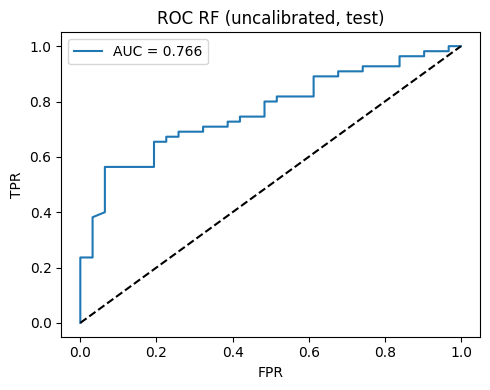

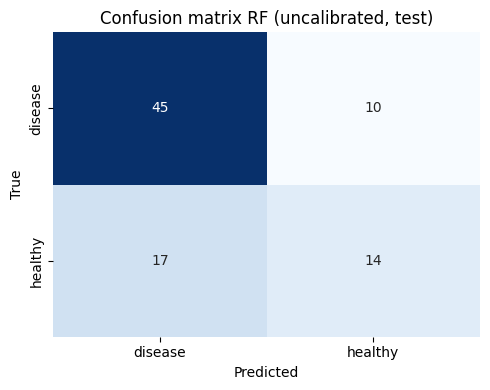

C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(
C:\Users\Marc2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\calibration.py:330: FutureWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(est

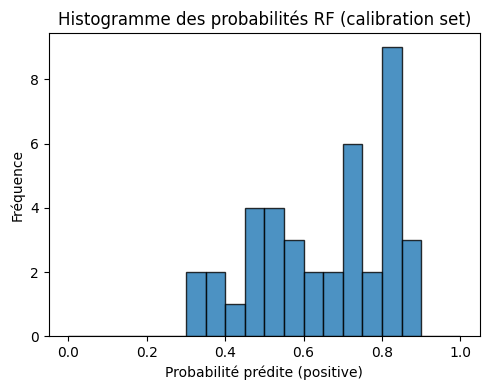

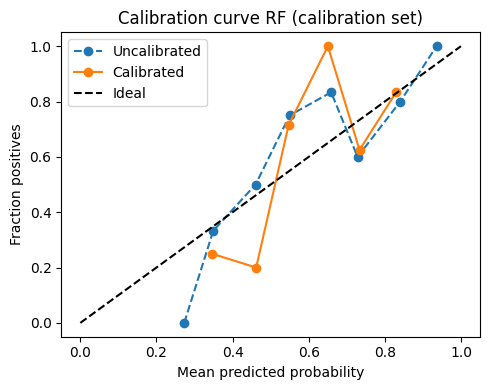

Rapport RF (calibrated):
               precision    recall  f1-score   support

     disease       0.72      0.87      0.79        55
     healthy       0.63      0.39      0.48        31

    accuracy                           0.70        86
   macro avg       0.67      0.63      0.63        86
weighted avg       0.69      0.70      0.68        86



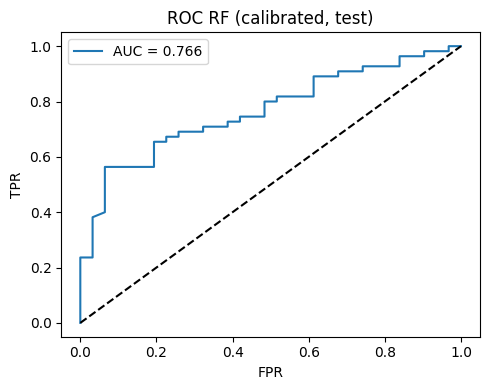

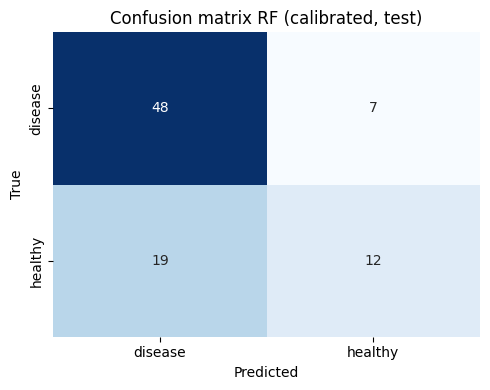

Meilleur seuil (Youden J) RF sur calib: 0.5240 | J=0.4560 | TPR=0.8846 | FPR=0.4286
Rapport RF (calibrated + threshold):
               precision    recall  f1-score   support

     disease       0.71      0.84      0.77        55
     healthy       0.57      0.39      0.46        31

    accuracy                           0.67        86
   macro avg       0.64      0.61      0.61        86
weighted avg       0.66      0.67      0.66        86



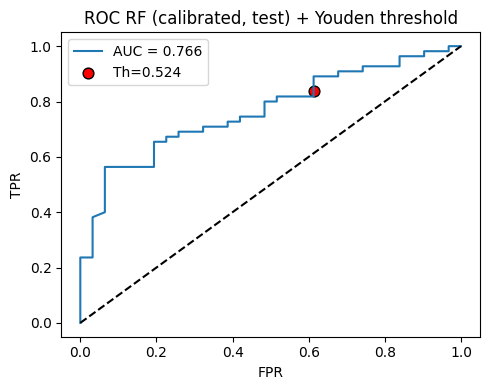

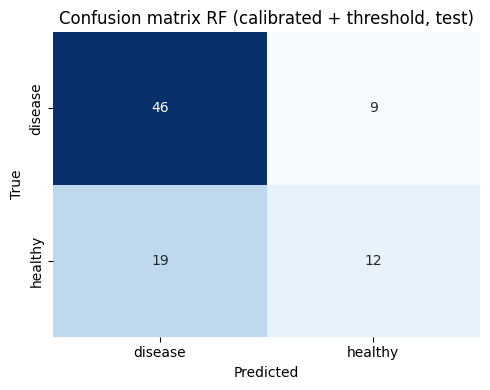

0    [0.6666666666666666, 0.9090909090909091, 0.727...
Name: fold_scores, dtype: object

In [4]:
# Initialisation de la liste de nom de modèles 
model_names = ["rf"]
# Iniatilisation de la liste de matrice de confusion
model_cm = [] 

# Création d'un nouveau dataframe pour récupérer les résultats de chaque modèle
report_df = pd.DataFrame(columns=["modèle", "accuracy","precision","recall","f1-score","auc","threshold","fold_scores"])


# Boucle sur tous les modèles de la liste
for model_name in model_names : 
    
    print(f"Actuellement, sur le modèle {model_name}...\n")
    
    if model_name == "nn" :
        
        input_dim = final_df.shape[1]-1 
        num_classes = len(final_df["diagnosis"].value_counts())
        nn_model = build_model(input_dim,num_classes,0.003)
        model = train_model(nn_model,final_df,"diagnosis")
        
    else :
        model = train_with_calibration(model_name,X,y)
        
    model_cm.append(model["cm_final"])
        
    report_df.loc[len(report_df)] = [model_name,
                                        model["accuracy"],
                                        model["precision"],
                                        model["recall"], 
                                        model["f1-score"], 
                                        model["auc_calibrated"],
                                        model["best_threshold"],
                                        model["fold_scores"]]
    

# Création des colonnes pour store les valeurs des modèles sur chaque fold
fold_scores = report_df["fold_scores"].copy()
for i in range(1,6) :
    report_df[f"fold_{i}"] = [fold_scores[j][i-1] for j in range(len(model_names))]
   
# Création de colonnes pour récupérer les "True Positives (TP)",....,"True Negatives (TN)" 
report_df["tp"] = [cm[0][0] for cm in model_cm]
report_df["tn"] = [cm[0][1] for cm in model_cm]
report_df["fp"] = [cm[1][0] for cm in model_cm]
report_df["fn"] = [cm[1][1] for cm in model_cm]

# Suppression de cette colonne puisqu'on en a plus besoin
report_df.pop("fold_scores")

In [ ]:
model.feature_importances_

In [ ]:
# Sauvegarde du dataframe
report_df.to_csv("report_df.csv",index=False)